In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gongyu = pd.read_csv("./gongyu_utf8.csv",encoding='utf-8',sep=',')
gongyu.head()

,价格,面积,编号,户型,楼层,朝向,行政区,道路,小区,地铁
0,1090,12,43451-A,4室1卫,6/23层,南,洪山区,马房山,狮城翰园,"地铁：距8号线,11号线马房山站650米"
1,1140,10,18824-B,5室1卫,2/45层,南,洪山区,关山大道,保利时代,地铁：距11号线关山大道站750米
2,1320,14,142561-C,3室1卫,15/32层,南,洪山区,关山大道,保利时代,地铁：距11号线关山大道站750米
3,1190,13,144014-B,3室1卫,5/11层,南,洪山区,光谷软件园,芭比伦堡,地铁：距2号线金融港北站1850米
4,1200,13,44500-C,4室2卫,25/29层,南,洪山区,马房山,泓悦府,"地铁：距8号线,11号线马房山站700米"


In [11]:
gongyu.columns = ['price','area','ID','shape','floor','dircetion','rigin','road','community','subway']


In [4]:
huxing = gongyu.groupby('shape')
shape = huxing.shape.value_counts()

In [9]:
shape

shape  shape
1室1卫   1室1卫       16
2室1卫   2室1卫       71
3室1卫   3室1卫     1762
3室2卫   3室2卫        4
4室1卫   4室1卫     3080
4室2卫   4室2卫       44
5室1卫   5室1卫      332
5室2卫   5室2卫       24
6室1卫   6室1卫        2
6室2卫   6室2卫        5
Name: shape, dtype: int64

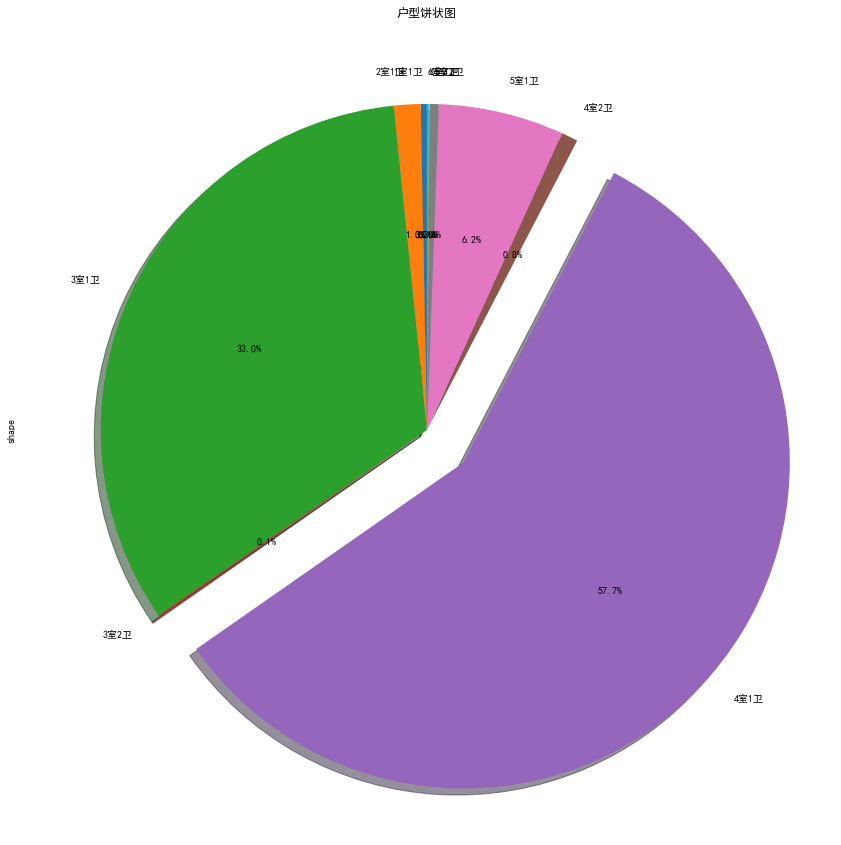

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize=(20,15))
shape.plot(
    kind='pie',
    labels=['1室1卫','2室1卫','3室1卫','3室2卫','4室1卫','4室2卫','5室1卫','5室2卫','6室1卫','6室2卫'],
    shadow=True,
    explode=[0,0,0,0,0.15,0,0,0,0,0],
    startangle=90,
    autopct='%1.1f%%',
    title='户型饼状图',
)

In [12]:
#第二问
rigin = gongyu.rigin.value_counts()
rigin.index


Index(['洪山区', '武昌区', '江夏区', '江汉区', '汉阳区', '硚口区', '江岸区', '东西湖区'], dtype='object')

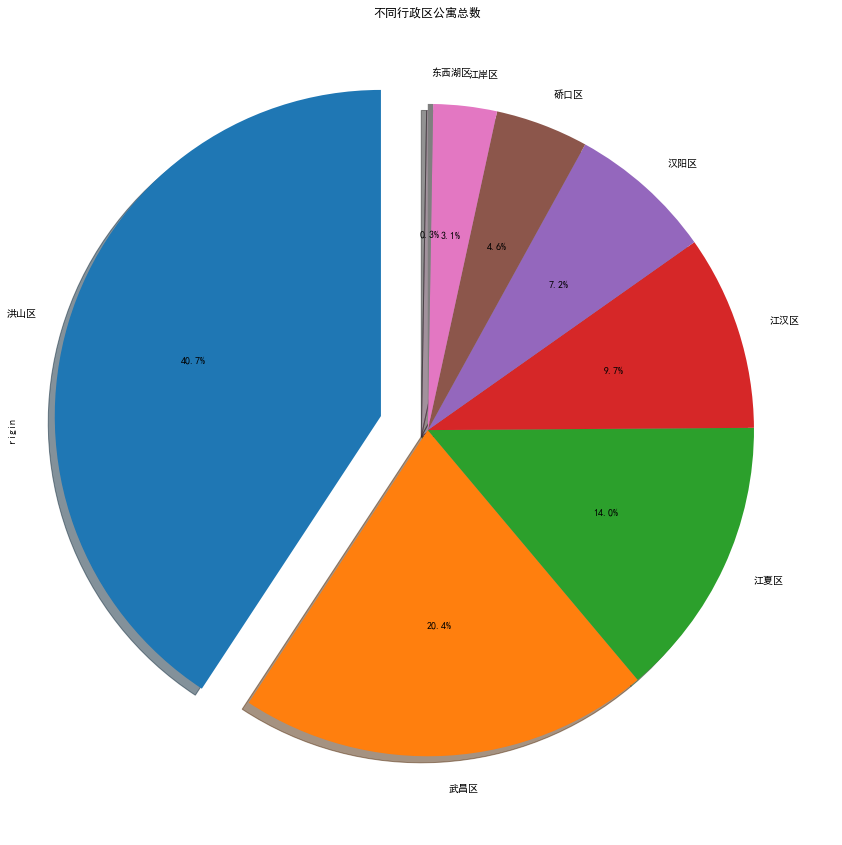

In [15]:
fig = plt.figure(figsize=(20,15))
rigin.plot(
    kind='pie',
    labels=rigin.index,
    shadow=True,
    explode=[0.15,0,0,0,0,0,0,0],
    startangle=90,
    autopct='%1.1f%%',
    title='不同行政区公寓总数',
)

In [19]:
#第三问
huxing = gongyu.groupby('shape').price.mean()
huxing=huxing.sort_values(axis=0)
huxing

shape
6室2卫     906.000000
6室1卫    1110.000000
4室1卫    1124.529221
5室2卫    1129.166667
5室1卫    1149.608434
3室1卫    1161.674234
3室2卫    1180.000000
4室2卫    1204.090909
2室1卫    1299.014085
1室1卫    2360.625000
Name: price, dtype: float64

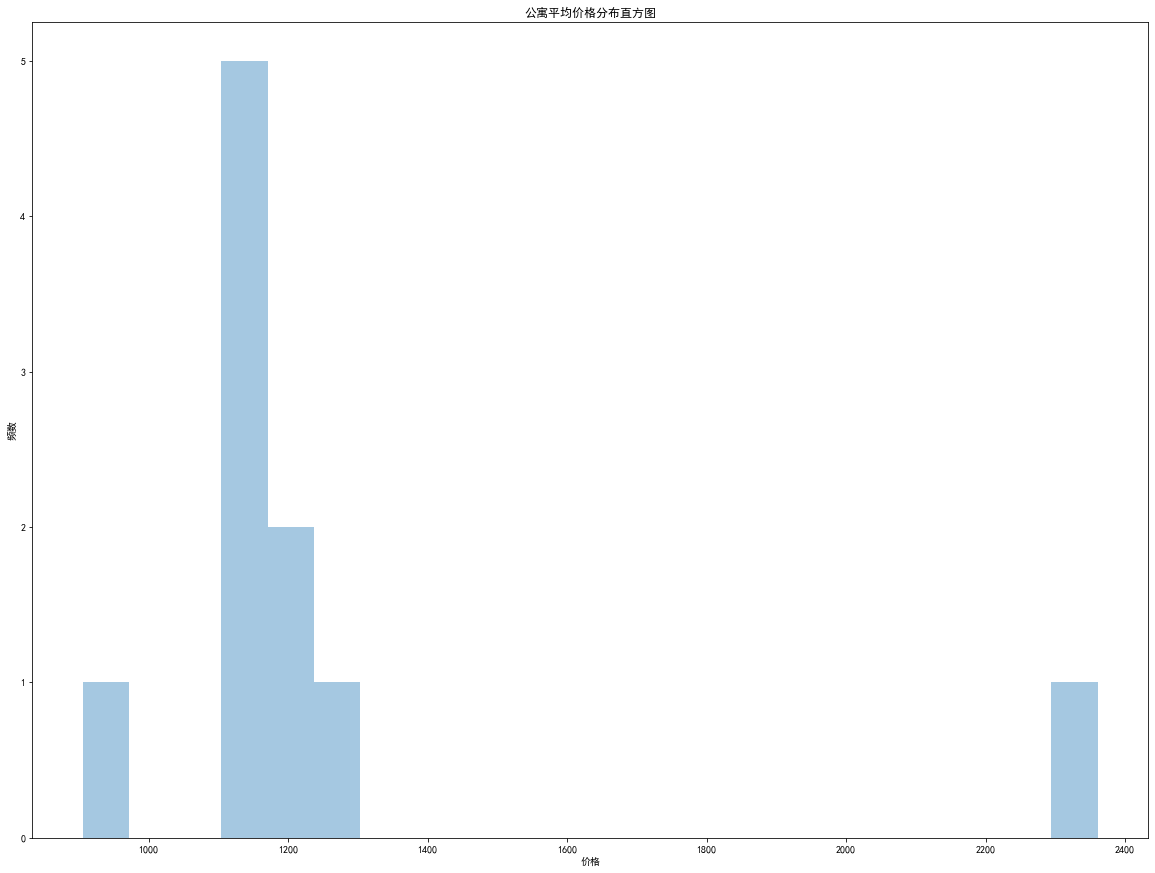

In [25]:
fig = plt.figure(figsize=(20,15))
sns.distplot(huxing,kde=False)
plt.title('公寓平均价格分布直方图')
plt.xlabel('价格')
plt.ylabel('频数')
plt.show()

In [26]:
#第四问
area = gongyu.area.value_counts()
area.reset_index()

,index,area
0,10,668
1,11,638
2,12,572
3,9,547
4,8,425
5,13,400
6,14,342
7,15,270
8,16,218
9,7,207


Text(0, 0.5, '数量')

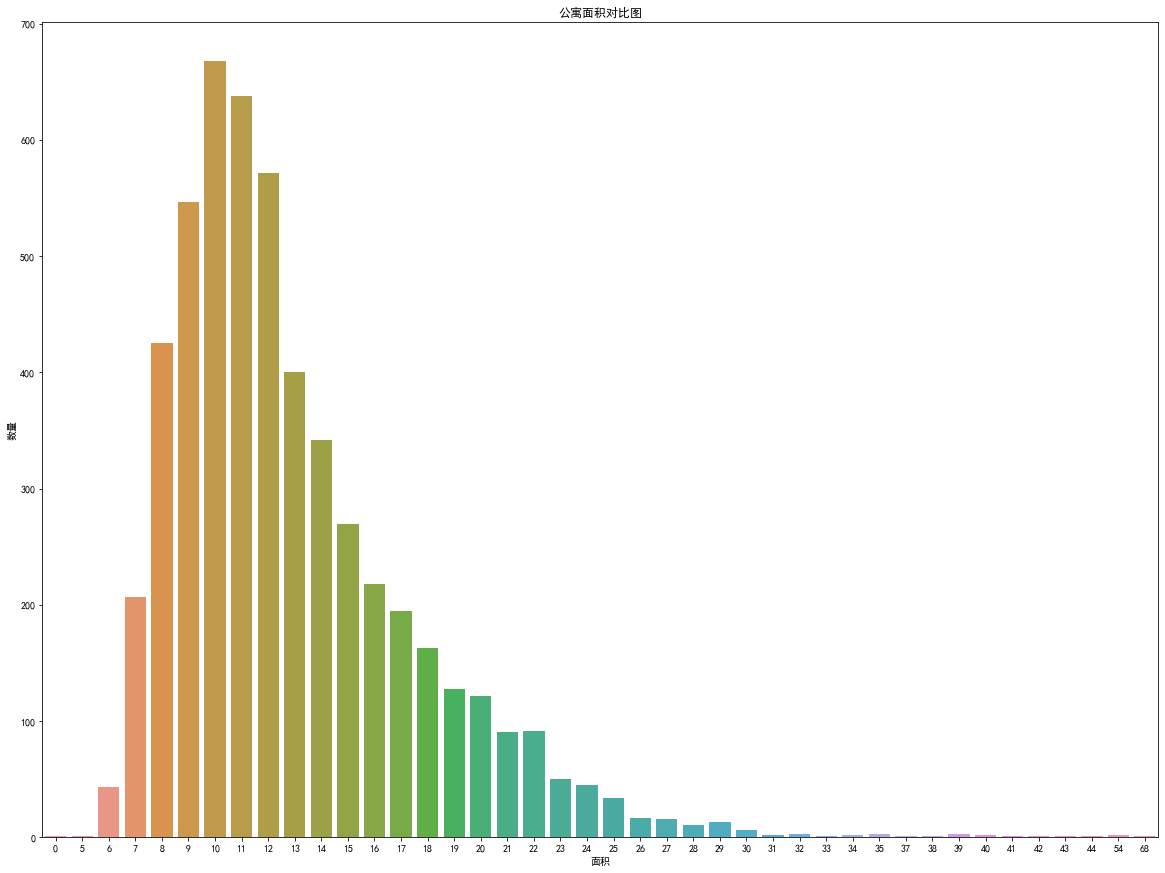

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize=(20,15))
sns.barplot(area.index,area.values)
plt.title('公寓面积对比图')
plt.xlabel('面积')
plt.ylabel('数量')